<a href="https://colab.research.google.com/github/Alice049/ml/blob/main/ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

加拿大東北沿海拉布拉多地區
16個高頻天線形成的相位陣列
總傳輸功率呈6.4千瓦的量綱
目標變數值Good表示電離層的自由電子呈現某種節構
接收到預測變數，經由自我相關函數aucocorrelation function的處理
函數的引數為脈衝編號及其時間ㄝ
17個脈衝編號各自有兩個屬性，分別是電磁訊號的兩個複數值，因此屬性矩陣共有34個預測變數．
讀入按機器學習人群的習慣，將資料存為屬性矩陣與類別標籤向量，並分別檢視維度與維數．
切分為75%與25%的訓練集與測試集之前，先檢查預測變數有無名目屬性，以及可能的遺缺值，結果發現此資料集非常適合k近鄰分類學習．

In [ ]:
import numpy as np
import pandas as pd
iono=pd.read_csv("/content/ionosphere.data",header=None)
X=iono.iloc[:,:-1]
y=iono.iloc[:,-1]

In [ ]:
print(X.shape)

(351, 34)


In [ ]:
print(y.shape)

(351,)


In [ ]:
print(X.dtypes)

0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
dtype: object


In [ ]:
print("遺缺{}個數值".format(X.isnull().sum().sum()))

遺缺0個數值


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=14)
print("訓練集有{}樣本".format(X_train.shape[0]))

訓練集有263樣本


In [ ]:
print("每個樣本有{}個屬性".format(X_train.shape[1]))

每個樣本有34個屬性


In [ ]:
print("測試集有{}樣本".format(X_test.shape[0]))

測試集有88樣本


In [ ]:
print("資料集類別分布為：\n{}".format(y.value_counts()/len(y)))

資料集類別分布為：
g    0.641026
b    0.358974
Name: 34, dtype: float64


In [ ]:
print("訓練集類別分布為：\n{}".format(y_train.value_counts()/len(y_train)))

訓練集類別分布為：
g    0.638783
b    0.361217
Name: 34, dtype: float64


In [ ]:
print("測試集類別分佈為:\n{}.".format(y_test.value_counts()/len(y_test)))

測試集類別分佈為:
g    0.647727
b    0.352273
Name: 34, dtype: float64.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
X_std=sc.fit_transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
estimator.fit(X_train_std,y_train)
for name in['metric','n_neighbors','p']:
  print(estimator.get_params()[name])

minkowski
5
2


In [ ]:
train_pred=estimator.predict(X_train_std)
print(train_pred[:5])

['b' 'g' 'b' 'g' 'b']


In [ ]:
print(y_train[:5])

51     b
24     g
168    b
136    b
71     b
Name: 34, dtype: object


In [ ]:
train_acc=np.mean(y_train==train_pred)*100
print("訓練集正確率為{0:.1f}%".format(train_acc))

訓練集正確率為87.1%


In [ ]:
y_pred=estimator.predict(X_test_std)
print(y_pred[:5])

['g' 'g' 'g' 'g' 'g']


In [ ]:
print(y_test[:5])

14     g
1      b
44     g
245    g
288    g
Name: 34, dtype: object


In [ ]:
test_acc=np.mean(y_test==y_pred)*100
print("測試集正確率為{0:.1f}%".format(test_acc))

測試集正確率為87.5%


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator,X_std,y,scoring='accuracy')
print(scores.shape)

(5,)


In [ ]:
average_accuracy=np.mean(scores)*100
print("三次平均正確率為{0:.1f}%".format(average_accuracy))

三次平均正確率為82.9%


In [ ]:
avg_scores=[]
all_scores=[]
parameter_values=list(range(1,21))
for n_neighbors in parameter_values:
  estimator=KNeighborsClassifier(n_neighbors=n_neighbors)
  sc=cross_val_score(estimator,X_std,y,scoring='accuracy')
  avg_scores.append(np.mean(sc))
  all_scores.append(sc)

In [ ]:
print(len(avg_scores))

20


In [ ]:
print(avg_scores)

[0.831830985915493, 0.8718712273641852, 0.8319114688128775, 0.8404828973843059, 0.8290945674044264, 0.8404426559356135, 0.817625754527163, 0.8290543259557344, 0.8119114688128773, 0.817625754527163, 0.817625754527163, 0.8319114688128773, 0.8176659959758551, 0.823380281690141, 0.8090945674044265, 0.8090945674044265, 0.8033802816901409, 0.8090945674044265, 0.7919517102615694, 0.800523138832998]


In [ ]:
print(len(all_scores))

20


In [ ]:
print(all_scores[:4])

[array([0.85915493, 0.75714286, 0.81428571, 0.88571429, 0.84285714]), array([0.84507042, 0.82857143, 0.82857143, 0.94285714, 0.91428571]), array([0.83098592, 0.77142857, 0.75714286, 0.92857143, 0.87142857]), array([0.83098592, 0.8       , 0.77142857, 0.92857143, 0.87142857])]


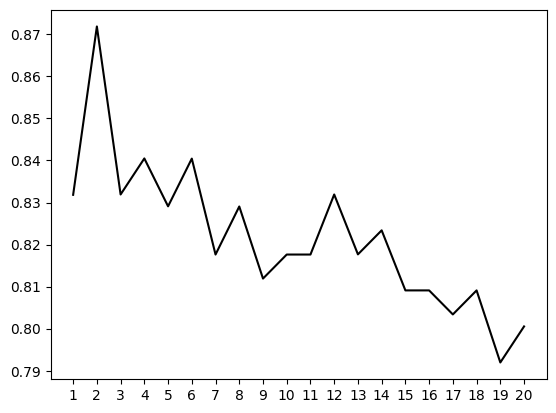

In [ ]:
from matplotlib import pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
plt.xticks(np.arange(0,21))
ax.plot(parameter_values,avg_scores,'-0')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([('scale',MinMaxScaler()),('predict',KNeighborsClassifier())])
scores=cross_val_score(pipe,X,y,scoring='accuracy')
print("三次正確率結果為{}%".format(scores*100))

三次正確率結果為[84.50704225 80.         77.14285714 88.57142857 84.28571429]%


In [ ]:
print("平均正確率為:{0:,.1f}%".format(np.mean(scores)*100))

平均正確率為:82.9%
